In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
jra55 = xr.open_dataset('/home/links/ct715/data_storage/reanalysis/jra55_daily/variables/mslp/slp_monthly_jra55_1958_2016.nc')
jra55 = jra55.resample(time="1MS").mean()
jra55 = jra55.mean('lon')
jra55['slp'] = jra55['slp'] / 100  # Convert from Pa to hPa
jra55

<xarray.Dataset> Size: 213kB
Dimensions:  (time: 708, lat: 73)
Coordinates:
  * lat      (lat) float64 584B -90.0 -87.5 -85.0 -82.5 ... 82.5 85.0 87.5 90.0
  * time     (time) datetime64[ns] 6kB 1958-01-01 1958-02-01 ... 2016-12-01
Data variables:
    slp      (time, lat) float32 207kB 1.01e+03 1.008e+03 ... 1.007e+03

In [3]:
# Use nearest grid point to −40° and −65° latitude
lat40 = jra55.lat.sel(lat=-40, method="nearest")
lat65 = jra55.lat.sel(lat=-65, method="nearest")
p40 = jra55['slp'].sel(lat=lat40)   # (time) hPa
p65 = jra55['slp'].sel(lat=lat65)   # (time) hPa

# Here I normalise with the full record
mean40, std40 = p40.mean('time'), p40.std('time')
mean65, std65 = p65.mean('time'), p65.std('time')

# standardise...????
p40_star = (p40 - mean40) / std40
p65_star = (p65 - mean65) / std65

# Calc difference
aoi = p40_star - p65_star

# Resample to quarterly means
aoi_qtr = aoi.resample(time="1QS-DEC").mean()

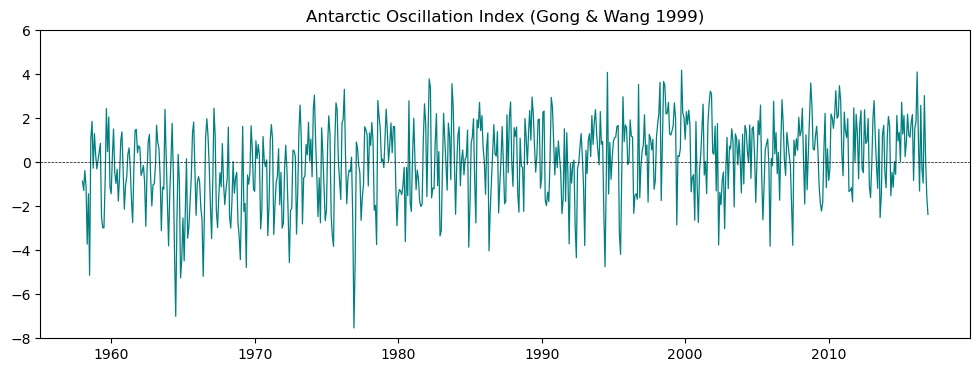

In [4]:
# Plot
plt.figure(figsize=(12, 4))
plt.plot(aoi.time, aoi, color="teal", linewidth=0.9)
plt.axhline(0, color="k", linewidth=0.5, linestyle="--")
plt.title(f"Antarctic Oscillation Index (Gong & Wang 1999)")
plt.ylim(-8,6)
plt.show()

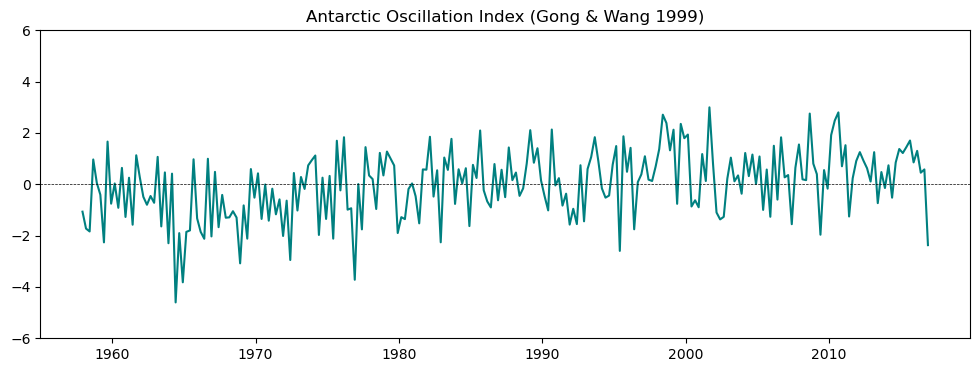

In [5]:
# Plot
plt.figure(figsize=(12, 4))
plt.plot(aoi_qtr.time, aoi_qtr, color="teal")
plt.axhline(0, color="k", linewidth=0.5, linestyle="--")
plt.title("Antarctic Oscillation Index (Gong & Wang 1999)")
plt.ylim(-6,6)
plt.show()


# Non-standardised

In [6]:
# Use nearest grid point to −40° and −65° latitude
lat40 = jra55.lat.sel(lat=-40, method="nearest")
lat65 = jra55.lat.sel(lat=-65, method="nearest")
p40 = jra55['slp'].sel(lat=lat40)   # (time) hPa
p65 = jra55['slp'].sel(lat=lat65)   # (time) hPa

# Calc difference
aoi_nonstd = p40 - p65
aoi_nonstd

<xarray.DataArray 'slp' (time: 708)> Size: 3kB
array([27.452637, 24.255371, 27.339905, 25.964355, 19.826172, 26.031494,
       14.043213, 32.96875 , 34.529724, 29.354614, 34.900146, 30.979248,
       28.233643, 30.055847, 30.207886, 32.351013, 24.140137, 20.039062,
       19.34491 , 26.097961, 35.158752, 31.6344  , 36.099365, 26.214844,
       25.364685, 29.352905, 34.02423 , 27.702393, 26.300598, 30.021729,
       25.157837, 28.015015, 33.12738 , 32.115845, 26.920532, 23.143005,
       26.014893, 26.981995, 30.718689, 31.110779, 27.785278, 23.175049,
       21.829163, 28.539978, 32.401184, 34.10724 , 30.230042, 31.238892,
       30.140198, 27.512085, 27.814209, 28.160583, 28.347168, 21.814392,
       29.204712, 32.381165, 32.757324, 27.313782, 25.028625, 25.663513,
       26.042297, 26.820923, 32.868896, 31.279297, 32.52716 , 29.934448,
       22.076294, 28.67334 , 28.025757, 36.60077 , 30.925049, 23.372498,
       17.841553, 24.45935 , 28.450012, 35.81421 , 28.923218, 18.565063,
        9.586609, 22.266663, 30.281067, 28.325073, 12.670654, 15.898804,
       20.668884, 15.85553 , 21.554077, 30.022339, 20.2229  , 19.825012,
       25.260376, 27.66101 , 35.194214, 36.12848 , 30.95398 , 23.053589,
       26.75586 , 25.8349  , 25.89038 , 22.962158, 21.665161, 12.312988,
       22.993347, 33.341187, 34.96118 , 34.227783, 29.619629, 24.068054,
       19.177307, 26.075012, 35.70404 , 32.94763 , 23.95935 , 20.26709 ,
       23.36908 , 26.235413, 23.986694, 31.453247, 27.673462, 24.535278,
...
       18.128845, 32.39215 , 30.84851 , 33.663757, 30.946411, 36.386047,
       33.388   , 34.372375, 36.01648 , 30.235413, 25.154968, 33.473755,
       26.98169 , 29.26471 , 36.490784, 41.385315, 38.20337 , 33.371216,
       32.096558, 33.705017, 34.75049 , 31.04364 , 26.445496, 24.996338,
       23.906006, 23.792114, 30.736084, 36.040833, 26.278809, 31.345459,
       26.089355, 28.004272, 35.717346, 36.4281  , 34.80432 , 36.460022,
       38.911682, 35.640015, 35.888428, 39.57361 , 37.918274, 30.214355,
       27.002563, 35.336304, 32.81781 , 31.657104, 36.19348 , 25.245483,
       24.692688, 25.959045, 25.024841, 37.14392 , 30.076843, 36.915222,
       35.05304 , 28.904724, 34.594666, 35.906067, 29.259155, 27.74347 ,
       34.812744, 32.880127, 33.748413, 36.43817 , 27.72284 , 26.215332,
       29.517029, 36.5636  , 38.227478, 34.241516, 31.110413, 26.155151,
       33.219055, 22.299316, 25.494629, 34.40027 , 34.778687, 28.970093,
       25.948303, 32.55249 , 34.44879 , 33.118042, 27.574646, 28.094482,
       27.965698, 30.221191, 28.25122 , 36.657776, 33.29187 , 34.884155,
       30.361145, 37.62506 , 34.57837 , 36.535156, 31.076538, 31.914429,
       35.61371 , 33.726196, 33.298035, 35.236816, 37.599304, 28.028076,
       34.399902, 35.604797, 41.62732 , 33.075867, 28.287903, 37.661377,
       29.650269, 27.675049, 39.82361 , 32.416565, 26.94281 , 23.934387],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 6kB 1958-01-01 1958-02-01 ... 2016-12-01

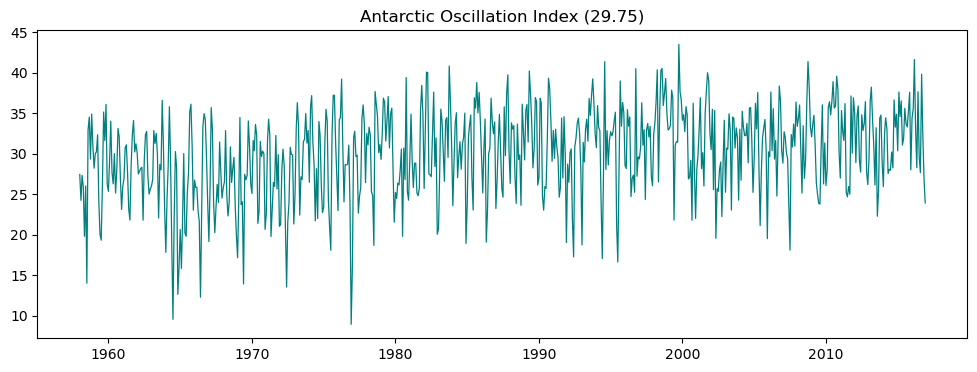

In [7]:
# Plot
plt.figure(figsize=(12, 4))
plt.plot(aoi_nonstd.time, aoi_nonstd, color="teal", linewidth=0.9)
plt.title(f"Antarctic Oscillation Index ({(aoi_nonstd.var().values.round(2))})")
plt.show()